# Hydrograph Development Notebooks

### Create a Breach Hydrograph for 2 locations at a levee using 1D HEC-RAS Model & USGS Gage Records 

### Example: Lisle, NY

In [1]:
import os
from glob import glob

from importlib import reload
import utils; reload(utils)
from utils import *
import ny_clean_nb; reload(ny_clean_nb)
from ny_clean_nb import *

import pandas as pd
import numpy as np
from scipy import interpolate 

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

###  Read in Gage data & Develop Base Hydrograph
    1. Read in Base Hydrograph & Scale to 1-pct using scale factor
    2. Manually Smooth the curve where needed
    
*See comment lines in [Helper Script](ny_clean_nb.py) for smoothing procedure.*

01509000_00060_dv.tsv
01509000_00060_iv.tsv
01509000_00065_iv.tsv
01509520_00065_iv.tsv
01511500_00065_iv.tsv




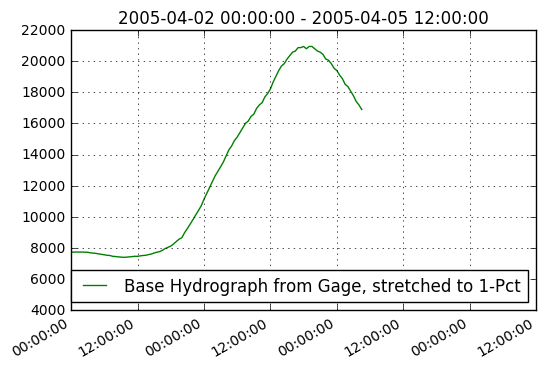

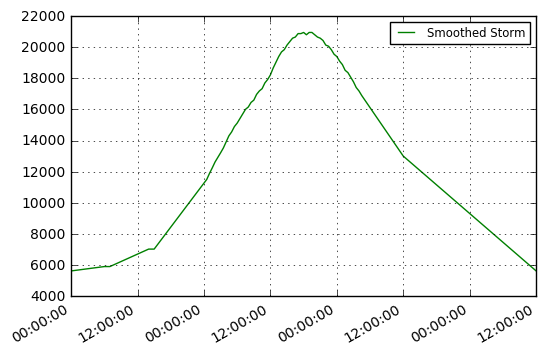

In [2]:
gage_data, data_dir = initialize()
base_storm_1pct = init_base_hydro(gage_data)
smooth_storm = smooth_base_hydro(base_storm_1pct)

# Procedure to create Breach Hydrograph

    1. Read in RAS data for XS of interest & create stage/discharge Rating Curve

    2. Convert River Discharge to stage using the rating curve from HEC-RAS

    3. Translate Stage to head (above selected breach height) and compute weir flow  
    
    4. Write calculated weir flow to file & input into HEC-RAS unsteady flow file

#### The Standard Weir Equation:
$$ Q = CLH^{2/3} $$

Where:  Q = discharge, C =weir coefficient, L = weir crest length, H = Energy head over the weir crest.


*From HEC-as Lateral Wier Coefficients, default Weir Coefficient of 2.0 (range is 1.5-2.6, given on page 3-50 of the 2D Manual)*

### Breach Location # 1:
[Click For Image](https://raw.githubusercontent.com/Dewberry-RSG/HydrologyTools/master/images/56045.65_location_1.JPG)


**RAS Data for XS 56045.65**

**
Inflow Data for Breach Location: **

C:\Users\slawler\Repos\HydrologyTools\sample_data\BreachData_56045.65_location_1.tsv


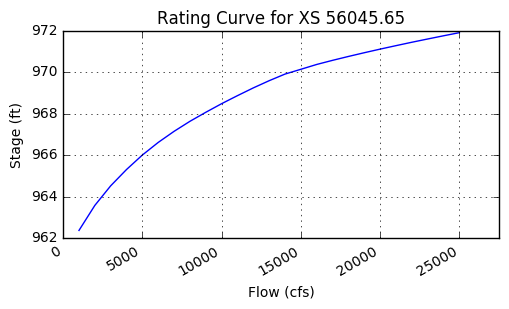

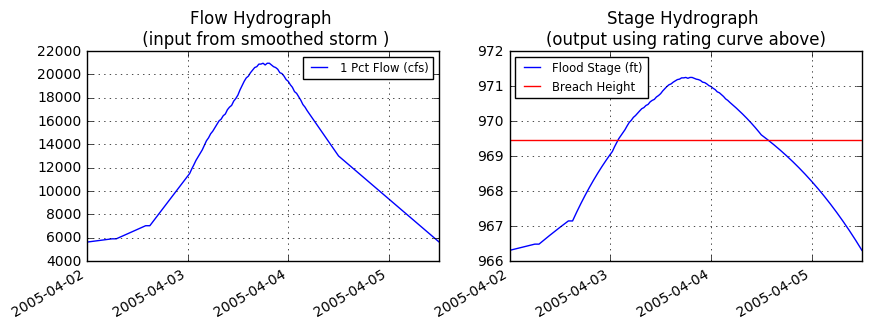

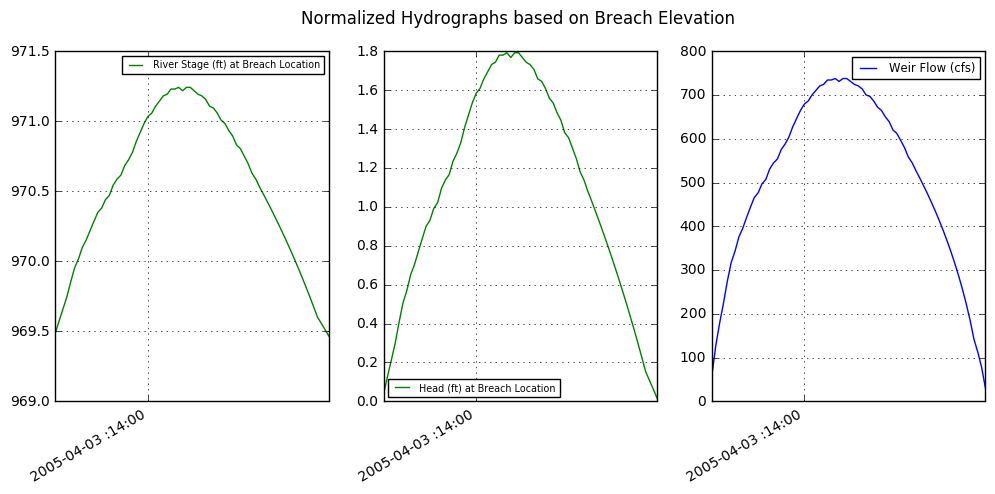

In [3]:
rasdata = r'p:\02\NY\Broome_Co_36007C\LAMP2\TECH\Analysis\Modeling\WorkingModels\Lisle_WhitPt\LAMPRAS\Lisle_WhitPt.p05.hdf'
station = 56045.65
breach_point = 1
breach_height = 969.45
GetBreachFlow(smooth_storm, rasdata, station, breach_point, breach_height, data_dir, date_int = 24)

### Breach Location # 2:
[Click For Image](https://raw.githubusercontent.com/Dewberry-RSG/HydrologyTools/master/images/53914.48_location_2.JPG)


**RAS Data for XS 53914.48**

**
Inflow Data for Breach Location: **

C:\Users\slawler\Repos\HydrologyTools\sample_data\BreachData_53914.48_location_2.tsv


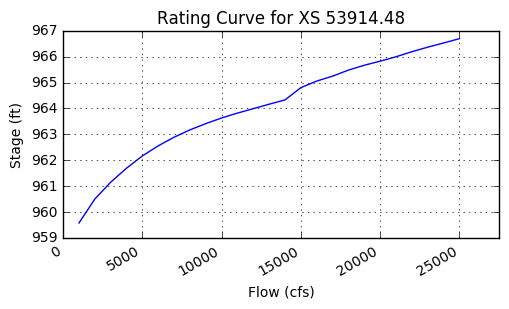

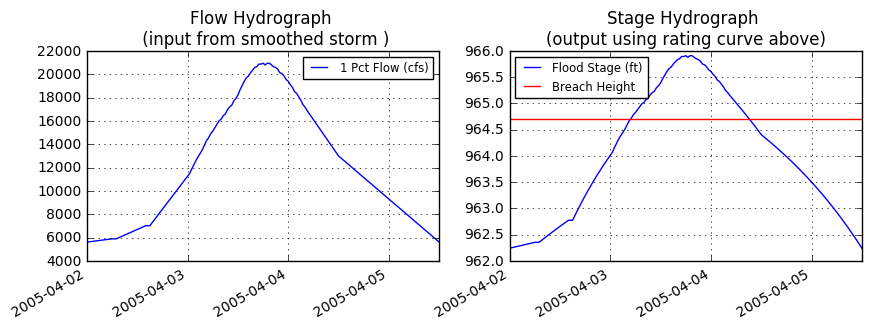

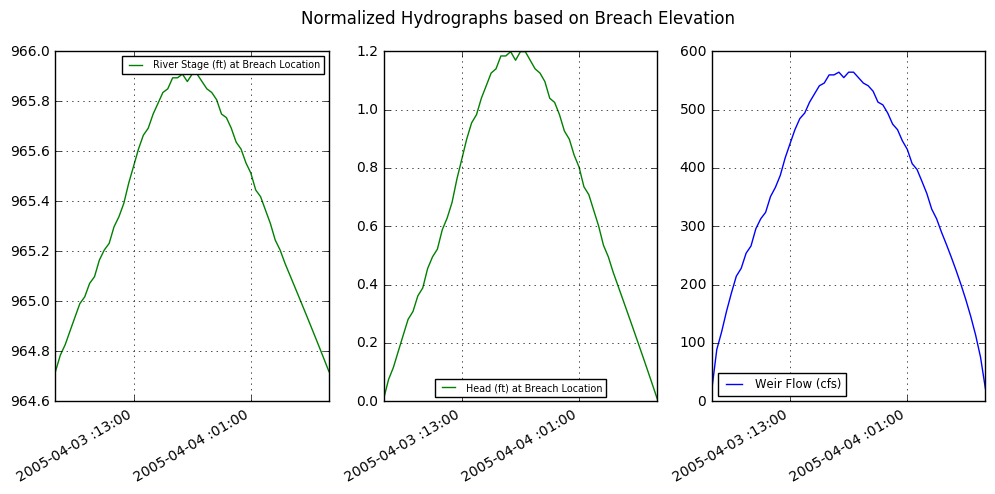

In [4]:
rasdata = r'p:\02\NY\Broome_Co_36007C\LAMP2\TECH\Analysis\Modeling\WorkingModels\Lisle_WhitPt\LAMPRAS\Lisle_WhitPt.p05.hdf'
station = 53914.48
breach_point = 2
breach_height = 964.71

GetBreachFlow(smooth_storm, rasdata, station, breach_point, breach_height, data_dir, date_int = 12)